In [53]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [29]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=100)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200,
                                                   random_state=42)
x_min = np.min(X_train)
x_max = np.max(X_train)
# print(x_min, x_max)
y_min = np.min(y_train)
y_max = np.max(y_train)
# print(y_min, y_max)
x_min, x_max, y_min, y_max

(-1.48905591662054, 2.5067285548356764, 0, 1)

In [ ]:
def mscatter(x, y, ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax = plt.gca()
    sc = ax.scatter(x, y, **kw)
    if (m is not None) and (len(m) == len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

In [56]:
def make_plot(X, y, plot_name, file_name, XX=None, YY=None, preds=None):
    plt.figure()
    sns.set_style("whitegrid")
    axes = plt.gca()
    axes.set_xlim([-2, 3])
    axes.set_ylim([-1.5, 2])
#     axes.set_xlim([x_min, x_max])
#     axes.set_ylim([y_min, y_max])
    axes.set(xlabel="$x_1$", ylabel="$x_s$")
    
#     plt.title(plot_name, fontsize=20, fontproperties='SimHei')
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    
    if (XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha=0.08, cmap=plt.cm.Spectral)
        plt.contourf(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Grays", vmin=0, vmax=.6)

    markers = ['o' if i == 1 else 's' for i in y.ravel()]
    mscatter(X[:, 0], X[:, 1], c=y.ravel(), s=20, 
            cmap=plt.cm.Spectral, edgecolors='none', m=markers, 
            alpha=0.7, ax=axes)
    
#     plt.savefig('../data/' + file_name)
#     plt.close()

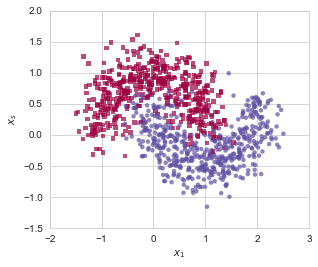

In [57]:
make_plot(X, y, 'moon dataset', 'moon_dataset.svg')